In [1]:
%matplotlib inline 
import pickle
import os
import numpy as np
import json
from PIL import Image,ImageDraw
import sys

import cv2
import matplotlib.pyplot as plt  
import matplotlib.patches as patches

from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float
from skimage import io
from skimage.measure import find_contours

from shapely.geometry import Polygon
from shapely.geometry import Point
from shapely.geometry import box

In [2]:
from random import sample

In [3]:
imagePath = r'C:\Users\jiali\Desktop\choroColorRead\generatedMaps\quantiles'
imageName = 'ohio_Blues_4_neg.jpg'
# testImages = os.listdir(imagePath)

In [4]:
# read detection results from pickle file
detectResultsPath = r'D:\OneDrive - The Ohio State University\choroColorRead'
detectResultFileName = 'detectResultSpatialPattern.pickle'
with open(detectResultsPath + '\\' + detectResultFileName, 'rb') as f:
    detectResults = pickle.load(f)

In [5]:
detectResult = detectResults[0]

In [6]:
property = detectResult[1]
boxes = property['rois']
masks = property['masks']
class_ids = property['class_ids']

# extract mask for mapping area
N = boxes.shape[0]
if not N:
    print("\n*** No instances to display *** \n")
else:
    assert boxes.shape[0] == masks.shape[-1] == class_ids.shape[0]

image = cv2.imread(imagePath + '\\' + imageName)
imageGray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

masked_image = image.astype(np.uint32).copy()
maskPolyList = []

In [7]:
image.shape

(966, 1576, 3)

In [8]:
height = image.shape[0]
print(height)
width = image.shape[1]
print(width)

966
1576


In [9]:
# get the polygon for mapping area
for i in range(N):
#     if i > 0:
#         continue
    if class_ids[i] != 3:
        continue
    # Bounding box
    if not np.any(boxes[i]):
        # Skip this instance. Has no bbox. Likely lost in image cropping.
        continue
    y1, x1, y2, x2 = boxes[i]
    bboxMap = box(x1, y1, x2, y2)
    # Mask
    mask = masks[:, :, i]
    print('shape of mask: ')
    print(mask.shape)

    # Mask Polygon
    # Pad to ensure proper polygons for masks that touch image edges.
    padded_mask = np.zeros((mask.shape[0] + 2, mask.shape[1] + 2), dtype=np.uint8)
    padded_mask[1:-1, 1:-1] = mask
    contours = find_contours(padded_mask, 0.5)
    for verts in contours:
        # Subtract the padding and flip (y, x) to (x, y)
        verts = np.fliplr(verts) - 1
        vertList = [(vert[0],vert[1]) for vert in verts]
        maskPolygon = Polygon(vertList)
        maskPolyList.append(maskPolygon)

shape of mask: 
(966, 1523)


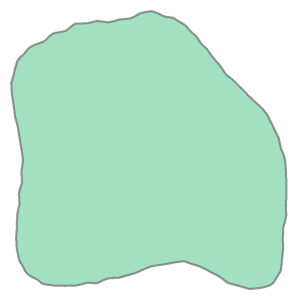

In [10]:
maskPolygon

In [11]:
# rgb color list
colorList = [[191, 214, 230], [107, 174, 216], [33, 114, 180], [239, 243, 255]]

In [12]:
def bgr2rgb(value):
    return value[2],value[0],value[1]
def valueEqualColor(value,color):
    colorR, colorG, colorB = color[0], color[1], color[2]
    valueR, valueG, valueB = value[0], value[1], value[2]
    if abs(colorR - valueR) > 10 or abs(colorB - valueB) > 10 or abs(colorG - valueG) > 10:
        return False
    else:
        return True

In [13]:
def rgb2Grey(dominantColor):
    rgb_weights = [0.2989, 0.5870, 0.1140]
    dominantColorGrey = int(np.dot(dominantColor, rgb_weights))
    return dominantColorGrey

In [14]:
# traverse the whole image
colorGrey0 = rgb2Grey(colorList[0])
colorGrey1 = rgb2Grey(colorList[1])
colorGrey2 = rgb2Grey(colorList[2])
colorGrey3 = rgb2Grey(colorList[3])

In [53]:
color0_b,color0_g,color0_r = colorList[0][0],colorList[0][1],colorList[0][2]
color1_b,color1_g,color1_r = colorList[1][0],colorList[1][1],colorList[1][2]
color2_b,color2_g,color2_r = colorList[2][0],colorList[2][1],colorList[2][2]
color3_b,color3_g,color3_r = colorList[3][0],colorList[3][1],colorList[3][2]

In [58]:
pixelCoordList0, pixelCoordList1, pixelCoordList2, pixelCoordList3 = [],[],[],[]
for i in range(height):
    if i % 100 == 0:
        print('i: ' + str(i))  
    for j in range(mask.shape[1]):
        # test x,y axis
#         if i != 148 or j != 257:
#             continue
        point = Point(j,i)
#         if bboxMap.contains(point) and maskPolygon.contains(point):
        if mask[i,j] == True:
#             print('yes!')
            value =  imageGray[i,j]
#             print(value)
            b, g, r = image[i,j]
            valueB, valueG, valueR = image[i,j]
#             value_rgb = value
#             print(value_rgb)
            if not (abs(b - g) < 10 and abs(b-r) < 10 and abs(g - r)<10):
                if abs(valueB - color0_b) <= 10 and abs(valueG - color0_g) <=10 and abs(valueR - color0_r)<=10:
                    print('0: j: '+ str(j) + ' i: ' + str(i))
                    pixelCoordList0.append((j,i))  
                elif abs(valueB - color1_b) <= 10 and abs(valueG - color1_g) <=10 and abs(valueR - color1_r)<=10:
                    print('1: j: '+ str(j) + ' i: ' + str(i))
                    pixelCoordList1.append((j,i))  
                elif abs(valueB - color2_b) <= 10 and abs(valueG - color2_g) <=10 and abs(valueR - color2_r)<=10:
                    print('0: j: '+ str(j) + ' i: ' + str(i))
                    pixelCoordList2.append((j,i))  
                elif abs(valueB - color3_b) <= 10 and abs(valueG - color3_g) <=10 and abs(valueR - color3_r)<=10:
                    print('0: j: '+ str(j) + ' i: ' + str(i))
                    pixelCoordList3.append((j,i))  

i: 0


C:\Users\jiali\anaconda3\envs\imageProcess\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in ubyte_scalars


0: j: 890 i: 96
0: j: 893 i: 96
0: j: 880 i: 97
0: j: 888 i: 97
0: j: 893 i: 97
0: j: 895 i: 97
i: 100
0: j: 880 i: 100
0: j: 864 i: 106
0: j: 865 i: 107
0: j: 867 i: 110
0: j: 853 i: 112
0: j: 859 i: 112
0: j: 860 i: 112
0: j: 855 i: 113
0: j: 857 i: 113
0: j: 858 i: 113
0: j: 862 i: 113
0: j: 863 i: 113
0: j: 849 i: 114
0: j: 850 i: 114
0: j: 856 i: 114
0: j: 848 i: 115
0: j: 853 i: 115
0: j: 855 i: 115
0: j: 851 i: 116
0: j: 852 i: 116
0: j: 850 i: 117
0: j: 851 i: 117
0: j: 848 i: 118
0: j: 849 i: 119
0: j: 832 i: 123
0: j: 834 i: 124
0: j: 397 i: 128
0: j: 455 i: 128
0: j: 461 i: 128
0: j: 462 i: 128
0: j: 469 i: 128
0: j: 470 i: 128
0: j: 471 i: 128
0: j: 472 i: 128
0: j: 473 i: 128
0: j: 476 i: 128
0: j: 477 i: 128
0: j: 879 i: 128
0: j: 296 i: 129
0: j: 297 i: 129
0: j: 384 i: 129
0: j: 385 i: 129
0: j: 386 i: 129
0: j: 387 i: 129
0: j: 390 i: 129
0: j: 391 i: 129
0: j: 419 i: 129
0: j: 420 i: 129
0: j: 421 i: 129
0: j: 422 i: 129
0: j: 423 i: 129
0: j: 429 i: 129
0: j: 474 i: 

0: j: 233 i: 208
0: j: 634 i: 208
0: j: 234 i: 213
0: j: 234 i: 214
0: j: 234 i: 215
0: j: 795 i: 220
0: j: 820 i: 223
0: j: 232 i: 224
0: j: 232 i: 225
0: j: 796 i: 227
0: j: 233 i: 228
0: j: 233 i: 229
0: j: 233 i: 230
0: j: 233 i: 231
0: j: 232 i: 233
0: j: 798 i: 234
0: j: 799 i: 234
0: j: 233 i: 235
0: j: 577 i: 235
0: j: 578 i: 235
0: j: 589 i: 235
0: j: 590 i: 235
0: j: 591 i: 235
0: j: 798 i: 235
0: j: 799 i: 235
0: j: 233 i: 236
0: j: 796 i: 236
0: j: 798 i: 236
0: j: 233 i: 237
0: j: 748 i: 237
0: j: 787 i: 237
0: j: 788 i: 237
0: j: 789 i: 237
0: j: 790 i: 237
0: j: 798 i: 237
0: j: 659 i: 238
0: j: 743 i: 238
0: j: 748 i: 238
0: j: 749 i: 238
0: j: 742 i: 239
0: j: 748 i: 239
0: j: 749 i: 239
0: j: 232 i: 240
0: j: 232 i: 241
0: j: 232 i: 242
0: j: 233 i: 246
0: j: 233 i: 247
0: j: 232 i: 248
0: j: 233 i: 253
0: j: 233 i: 254
0: j: 233 i: 255
0: j: 660 i: 259
0: j: 660 i: 270
0: j: 695 i: 278
0: j: 695 i: 279
0: j: 651 i: 280
0: j: 652 i: 280
0: j: 653 i: 280
0: j: 654 i: 2

0: j: 799 i: 471
0: j: 794 i: 472
0: j: 798 i: 472
0: j: 799 i: 472
0: j: 798 i: 473
0: j: 799 i: 473
0: j: 799 i: 474
0: j: 800 i: 474
0: j: 456 i: 478
0: j: 292 i: 479
0: j: 454 i: 479
0: j: 455 i: 479
0: j: 456 i: 479
0: j: 457 i: 479
0: j: 957 i: 479
0: j: 292 i: 480
0: j: 457 i: 480
0: j: 958 i: 480
0: j: 288 i: 481
0: j: 292 i: 481
0: j: 957 i: 481
0: j: 292 i: 482
0: j: 448 i: 482
0: j: 921 i: 482
0: j: 923 i: 482
0: j: 924 i: 482
0: j: 957 i: 482
0: j: 368 i: 483
0: j: 448 i: 483
0: j: 921 i: 483
0: j: 922 i: 483
0: j: 923 i: 483
0: j: 924 i: 483
0: j: 958 i: 483
0: j: 448 i: 484
0: j: 448 i: 485
0: j: 448 i: 486
0: j: 448 i: 487
0: j: 956 i: 487
0: j: 448 i: 488
0: j: 953 i: 488
0: j: 288 i: 489
0: j: 289 i: 489
0: j: 448 i: 489
0: j: 288 i: 490
0: j: 289 i: 490
0: j: 292 i: 490
0: j: 448 i: 490
0: j: 954 i: 490
0: j: 957 i: 490
0: j: 288 i: 491
0: j: 289 i: 491
0: j: 292 i: 491
0: j: 448 i: 491
0: j: 954 i: 491
0: j: 957 i: 491
0: j: 448 i: 492
0: j: 953 i: 492
0: j: 954 i: 4

0: j: 771 i: 717
0: j: 625 i: 718
0: j: 772 i: 719
0: j: 232 i: 721
0: j: 591 i: 721
0: j: 233 i: 722
0: j: 230 i: 724
0: j: 234 i: 724
0: j: 231 i: 725
0: j: 232 i: 725
0: j: 235 i: 725
0: j: 624 i: 725
0: j: 230 i: 726
0: j: 233 i: 726
0: j: 236 i: 726
0: j: 231 i: 727
0: j: 232 i: 727
0: j: 234 i: 727
0: j: 235 i: 727
0: j: 591 i: 728
0: j: 637 i: 728
0: j: 638 i: 728
0: j: 644 i: 728
0: j: 591 i: 729
0: j: 643 i: 729
0: j: 644 i: 729
0: j: 240 i: 730
0: j: 591 i: 730
0: j: 643 i: 730
0: j: 644 i: 730
0: j: 241 i: 731
0: j: 286 i: 731
0: j: 643 i: 731
0: j: 285 i: 732
0: j: 367 i: 732
0: j: 279 i: 733
0: j: 280 i: 733
0: j: 584 i: 733
0: j: 775 i: 733
0: j: 241 i: 734
0: j: 245 i: 734
0: j: 269 i: 734
0: j: 274 i: 734
0: j: 275 i: 734
0: j: 276 i: 734
0: j: 280 i: 734
0: j: 584 i: 734
0: j: 243 i: 735
0: j: 271 i: 735
0: j: 273 i: 735
0: j: 274 i: 735
0: j: 278 i: 735
0: j: 279 i: 735
0: j: 286 i: 735
0: j: 775 i: 735
0: j: 387 i: 737
0: j: 588 i: 737
0: j: 589 i: 737
0: j: 387 i: 7

0: j: 395 i: 828
0: j: 396 i: 828
0: j: 397 i: 828
0: j: 400 i: 828
0: j: 534 i: 828
0: j: 536 i: 828
0: j: 537 i: 828
0: j: 538 i: 828
0: j: 443 i: 829
0: j: 444 i: 829
0: j: 445 i: 829
0: j: 565 i: 829
0: j: 398 i: 830
0: j: 399 i: 830
0: j: 446 i: 830
0: j: 447 i: 830
0: j: 451 i: 830
0: j: 452 i: 830
0: j: 540 i: 830
0: j: 543 i: 830
0: j: 565 i: 830
0: j: 394 i: 831
0: j: 395 i: 831
0: j: 396 i: 831
0: j: 397 i: 831
0: j: 442 i: 831
0: j: 443 i: 831
0: j: 444 i: 831
0: j: 445 i: 831
0: j: 448 i: 831
0: j: 565 i: 831
0: j: 564 i: 832
0: j: 565 i: 832
0: j: 566 i: 832
0: j: 527 i: 833
0: j: 564 i: 833
0: j: 565 i: 833
0: j: 566 i: 833
0: j: 564 i: 834
0: j: 565 i: 834
0: j: 464 i: 835
0: j: 465 i: 835
0: j: 466 i: 835
0: j: 526 i: 835
0: j: 527 i: 835
0: j: 564 i: 835
0: j: 565 i: 835
0: j: 526 i: 836
0: j: 564 i: 836
0: j: 565 i: 836
0: j: 401 i: 837
0: j: 402 i: 837
0: j: 564 i: 837
0: j: 565 i: 837
0: j: 400 i: 838
0: j: 402 i: 838
0: j: 404 i: 838
0: j: 405 i: 838
0: j: 467 i: 8

In [55]:
pixelCoordList0_sample = sample(pixelCoordList0,int(len(pixelCoordList0)/100))
pixelCoordList1_sample = sample(pixelCoordList1,int(len(pixelCoordList1)/100))
pixelCoordList2_sample = sample(pixelCoordList2,int(len(pixelCoordList2)/100))
pixelCoordList3_sample = sample(pixelCoordList3,int(len(pixelCoordList3)/100))

In [60]:
print(len(pixelCoordList0))
print(len(pixelCoordList1))
print(len(pixelCoordList2))
print(len(pixelCoordList3))

1
0
0
2165


In [56]:
pixelCoordList_sample = pixelCoordList0_sample + pixelCoordList1_sample + pixelCoordList2_sample + pixelCoordList3_sample

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

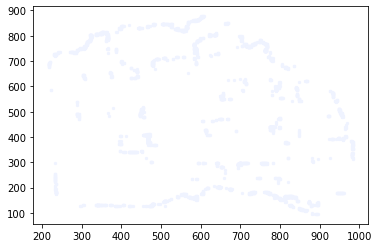

In [59]:
fig = plt.figure()
ax = fig.add_subplot()
xList = [pixelCoord[0] for pixelCoord in pixelCoordList0]
yList = [pixelCoord[1] for pixelCoord in pixelCoordList0]
ax.scatter(xList, yList, s = 5,c = np.asarray(colorList[0])/255.0)

xList = [pixelCoord[0] for pixelCoord in pixelCoordList1]
yList = [pixelCoord[1] for pixelCoord in pixelCoordList1]
ax.scatter(xList, yList, s = 5,c = np.asarray(colorList[1])/255.0)

xList = [pixelCoord[0] for pixelCoord in pixelCoordList2]
yList = [pixelCoord[1] for pixelCoord in pixelCoordList2]
ax.scatter(xList, yList, s = 5,c = np.asarray(colorList[2])/255.0)

xList = [pixelCoord[0] for pixelCoord in pixelCoordList3]
yList = [pixelCoord[1] for pixelCoord in pixelCoordList3]
ax.scatter(xList, yList, s = 5,c = np.asarray(colorList[3])/255.0)
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

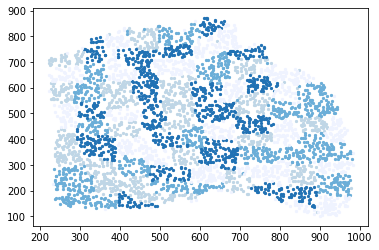

In [19]:
fig = plt.figure()
ax = fig.add_subplot()
xList = [pixelCoord[0] for pixelCoord in pixelCoordList0_sample]
yList = [pixelCoord[1] for pixelCoord in pixelCoordList0_sample]
ax.scatter(xList, yList, s = 5,c = np.asarray(colorList[0])/255.0)

xList = [pixelCoord[0] for pixelCoord in pixelCoordList1_sample]
yList = [pixelCoord[1] for pixelCoord in pixelCoordList1_sample]
ax.scatter(xList, yList, s = 5,c = np.asarray(colorList[1])/255.0)

xList = [pixelCoord[0] for pixelCoord in pixelCoordList2_sample]
yList = [pixelCoord[1] for pixelCoord in pixelCoordList2_sample]
ax.scatter(xList, yList, s = 5,c = np.asarray(colorList[2])/255.0)

xList = [pixelCoord[0] for pixelCoord in pixelCoordList3_sample]
yList = [pixelCoord[1] for pixelCoord in pixelCoordList3_sample]
ax.scatter(xList, yList, s = 5,c = np.asarray(colorList[3])/255.0)
plt.show()

### calculate pair-wise shortest path

In [19]:
import math
from sklearn.neighbors import KDTree

In [20]:
def distance(coord1, coord2):
    x1, y1 = coord1[0], coord1[1]
    x2, y2 = coord2[0], coord2[1]
    dist = math.sqrt((x1 - x2)**2 + (y1 - y2)**2)
    return dist

In [21]:
classHighestValues = pixelCoordList2_sample # the third color is with the largest value
numPoints = len(classHighestValues)
X = np.array([[coord[0],coord[1]] for coord in classHighestValues])
kdt = KDTree(X, leaf_size=30, metric='euclidean')
queryResults = kdt.query(X, k=2, return_distance=True)
queryResults20 = kdt.query(X, k=200, return_distance=True)
queryResultsAll = kdt.query(X, k=numPoints, return_distance=True)
distanceArray = queryResults[0]
distanceArray20 = queryResults20[0]
distanceArrayAll = queryResultsAll[0]
distanceArray

array([[0.        , 7.61577311],
       [0.        , 1.        ],
       [0.        , 2.23606798],
       ...,
       [0.        , 4.47213595],
       [0.        , 1.41421356],
       [0.        , 6.32455532]])

In [22]:
distanceList20 = distanceArray20.tolist()
distanceList20 = [sum(distance20[1:200])/199 for distance20 in distanceList20]
distanceList20

[96.79932032580321,
 185.22708706277618,
 71.33349218164602,
 159.7903775702635,
 197.6380423655575,
 79.68351497066625,
 111.61905422528653,
 88.0798346969278,
 91.20948433751535,
 91.26685408036127,
 81.21293571372378,
 115.07580257512727,
 89.68804753453003,
 85.82336357800267,
 135.14505255947287,
 80.71105409831397,
 80.94706949562327,
 88.72225402002782,
 119.66406307872636,
 79.3504016541635,
 87.97984438558231,
 116.65964024261541,
 148.1650502665186,
 100.39167298045753,
 161.7839064466083,
 98.15041575037193,
 122.35112043732734,
 102.49835785119839,
 113.13741483490783,
 74.28994592440249,
 78.39168436127414,
 81.75528948524178,
 106.73849501012562,
 102.97450795189849,
 97.5806846845807,
 79.64828261770349,
 83.20395209538388,
 94.6924631837322,
 88.15652223955703,
 99.34887933229568,
 86.83103185418038,
 86.71251902951883,
 122.02592215056471,
 101.73336189634908,
 111.20059519036874,
 101.79586744173099,
 152.4668159052626,
 87.4439022695863,
 79.82115905735483,
 112.8426

In [23]:
distanceArrayAll

array([[  0.        ,   7.61577311,  13.        , ..., 479.08767465,
        482.16179857, 482.68519762],
       [  0.        ,   1.        ,   8.        , ..., 755.47931805,
        758.13059561, 758.98155445],
       [  0.        ,   2.23606798,   9.21954446, ..., 447.18005322,
        447.79459577, 450.41869411],
       ...,
       [  0.        ,   4.47213595,   7.28010989, ..., 680.87150036,
        681.38461973, 685.82286343],
       [  0.        ,   1.41421356,   4.        , ..., 425.61954842,
        428.90092096, 430.19181768],
       [  0.        ,   6.32455532,  14.31782106, ..., 433.46164767,
        435.72468372, 442.63416045]])

In [24]:
import statistics

In [25]:
distanceListAll = distanceArrayAll.tolist()
distanceListAll = [statistics.median(distanceAll) for distanceAll in distanceListAll]
distanceListAll

[213.9369065869655,
 421.4356415871823,
 217.99311915746333,
 396.1843005471065,
 491.92682382647115,
 249.33912649241395,
 302.2333535531775,
 228.63289352147035,
 217.50632174720806,
 267.0131082924582,
 252.05158202241066,
 316.8359196808342,
 290.6217472936256,
 254.00787389370433,
 365.9207564487153,
 249.23884127479008,
 250.09798079952586,
 227.7740108089595,
 316.22776601683796,
 251.02390324429265,
 264.8773300982929,
 328.3534680797509,
 375.6820464169136,
 299.3008519867593,
 453.61768043143996,
 278.7059382216317,
 326.1977927577071,
 288.61739379323626,
 314.1862504948299,
 231.93102422918759,
 216.8155898453799,
 252.01785651020842,
 281.2578887782528,
 290.31879029783795,
 223.22410264126944,
 248.93774322107123,
 255.9785147234041,
 214.67417171145672,
 290.7593506664919,
 277.48153091692427,
 254.5937941113255,
 238.81792227552774,
 340.1543767173958,
 296.1621177666043,
 318.8494942759044,
 296.73051747334654,
 383.4188310451118,
 245.50560075077718,
 240.865107477193

### visualize distribution of distances

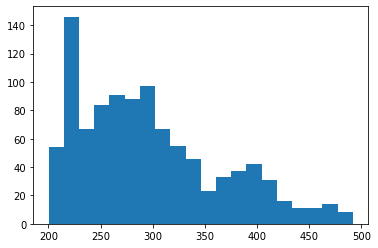

In [26]:
plt.hist(distanceListAll, 20)
plt.show()

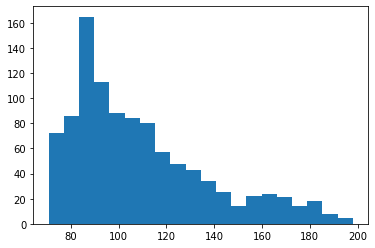

In [27]:
plt.hist(distanceList20, 20)
plt.show()

### calculate distance list for random distribution in the region

In [44]:
import alphashape

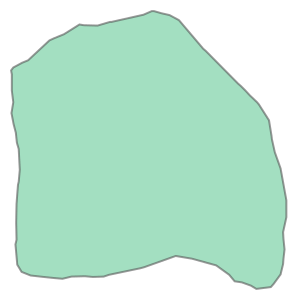

In [45]:
alpha_shape = alphashape.alphashape(pixelCoordList_sample, 0.01) # convex hull
alpha_shape

In [46]:
xList = [pixelCoord[0] for pixelCoord in pixelCoordList_sample]
yList = [pixelCoord[1] for pixelCoord in pixelCoordList_sample]
xMin, xMax = min(xList), max(xList)
yMin, yMax = min(yList), max(yList)
yMid = int((yMin + yMax) / 2)
xMin, xMax, yMin, yMax, yMid

(222, 983, 102, 870, 486)

In [31]:
import random

In [32]:
numPoints

1021

In [33]:
randomPointList = []
while len(randomPointList) < numPoints:
    x = random.randint(xMin,int(xMax-(xMax-xMin) /2) )
    y = random.randint(yMin,int(yMax-(yMax-yMin) /2) )
    point = Point(x,y)
    if alpha_shape.contains(point):
        randomPointList.append(point)
len(randomPointList)

1021

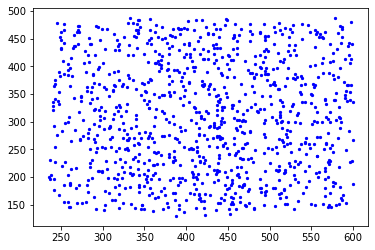

In [34]:
fig = plt.figure()
ax = fig.add_subplot()
xList = [pixelCoord.x for pixelCoord in randomPointList]
yList = [pixelCoord.y for pixelCoord in randomPointList]
ax.scatter(xList, yList, s = 5,c = 'blue')

plt.show()

In [35]:
X = np.array([[pixelCoord.x,pixelCoord.y] for pixelCoord in randomPointList])
kdt = KDTree(X, leaf_size=30, metric='euclidean')
queryResultsAllRandom = kdt.query(X, k=numPoints, return_distance=True)

In [36]:
distanceArrayAllRandom = queryResultsAllRandom[0]
distanceListAllRandom = distanceArrayAllRandom.tolist()
distanceListAllRandom = [statistics.median(distanceAllRandom) for distanceAllRandom in distanceListAllRandom]
distanceListAllRandom

[162.74212730574712,
 184.88915598271305,
 149.4590244849738,
 165.0242406436097,
 134.6291201783626,
 156.26259949200897,
 259.7537295208675,
 154.85799947048264,
 142.56226709757388,
 175.6843760839307,
 176.40011337864837,
 192.21082175569617,
 169.1892431568863,
 164.00304875214974,
 139.12943613772032,
 270.31278179176064,
 134.08206442324789,
 158.24032355881985,
 206.48002324680226,
 190.06577808748213,
 181.02486017119307,
 135.67977004697494,
 250.353749722268,
 174.1952927033334,
 208.4346420343797,
 133.4541119636259,
 202.07424378183381,
 143.22360140703069,
 195.00256408570633,
 201.02238681301145,
 208.62646045025065,
 203.59027481684876,
 178.21616088334974,
 224.61745257214542,
 253.17977802344325,
 171.81676286090365,
 147.24808997063425,
 263.21094202179364,
 142.89856542317,
 200.21238722916223,
 133.13526955694348,
 151.2084653714864,
 253.64739304790814,
 166.96406799069075,
 184.1140950606444,
 191.637678967368,
 158.927656498169,
 153.40469353966978,
 154.3243337

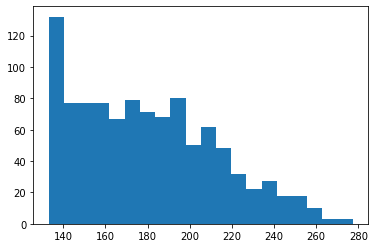

In [37]:
plt.hist(distanceListAllRandom, 20)
plt.show()

### compare distanceListAll (observed) and distanceListAllRandom (random distribution)

In [38]:
from scipy.stats import ranksums

In [39]:
randomSampleArray = np.asarray(distanceListAllRandom)
mapSampleArray = np.asarray(distanceListAll)

In [40]:
ranksums(mapSampleArray, randomSampleArray)

RanksumsResult(statistic=36.31614182650584, pvalue=8.999804212413112e-289)

In [41]:
ranksums(mapSampleArray, randomSampleArray,alternative = 'less')

RanksumsResult(statistic=36.31614182650584, pvalue=1.0)

In [42]:
ranksums(mapSampleArray, randomSampleArray,alternative = 'greater')

RanksumsResult(statistic=36.31614182650584, pvalue=4.499902106206556e-289)

### try to use the random lines to get number of clusters

In [20]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [21]:
sil = []
difSilList = []
kmax = 100
x = pixelCoordList0_sample
# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(3, kmax+1):
#     print('K: '+str(k))
    kmeans = KMeans(n_clusters = k,random_state=0).fit(x)
    labels = kmeans.labels_
    silScore = silhouette_score(x, labels, metric = 'euclidean')
    difSil = 0
    if len(sil) > 0:
        difSil = silScore - sil[-1]
    sil.append(silScore)
    difSilList.append(difSil)
print(sil)

# find the best index of difSil
index = 0
maxValue = max(sil)
maxIndex = sil.index(maxValue)
maxDif = max(difSilList)
while maxIndex >= 3:
    maxValue = sil[maxIndex]
    i = maxIndex - 1
    if difSilList[maxIndex] < maxDif / 10:
        maxIndex = maxIndex - 1
    else:
        break
numClusters = maxIndex + 2
kmeans0 = KMeans(n_clusters = numClusters).fit(x)
kmeans0.cluster_centers_

[0.4586395565122611, 0.45838411724924316, 0.42739730404165466, 0.42793400894646205, 0.464762339850638, 0.47821737828372335, 0.4970783454065147, 0.5247132298355999, 0.5434383065865895, 0.5441054651348018, 0.5636928288868078, 0.5845592171685512, 0.597411498231961, 0.6162549820235173, 0.6165836027884942, 0.6062704404352308, 0.5989912115985122, 0.6039288328350453, 0.5996736386053342, 0.5910786430897262, 0.5797082694907352, 0.5825860172045665, 0.5782643863231233, 0.5468367764873481, 0.5465360226051945, 0.544637596446878, 0.5082051978156428, 0.5432325611424406, 0.5095496233885595, 0.5049901549458049, 0.5016313328798175, 0.48169827299515006, 0.49933340968836637, 0.4824537846467807, 0.4601603109803225, 0.4666219895616625, 0.47441335097830695, 0.4396894157825195, 0.4412193012237581, 0.47206553034279436, 0.46443920512620135, 0.4529315871422664, 0.43997786966800145, 0.4339327829586197, 0.45659349537272764, 0.4349372643760019, 0.44263934931357796, 0.44330398487507344, 0.4283439347765445, 0.4291399

array([[261.        , 641.34693878],
       [884.35087719, 457.71929825],
       [371.18584071, 247.90265487],
       [545.21259843, 555.60629921],
       [690.07142857, 236.5952381 ],
       [724.12765957, 680.82978723],
       [558.12195122, 334.58536585],
       [269.21      , 360.56      ],
       [394.11363636, 576.05681818],
       [463.18032787, 790.67213115],
       [862.43859649, 256.22807018],
       [731.06666667, 536.43333333],
       [488.46575342, 189.52054795],
       [436.30952381, 442.35714286],
       [740.26829268, 401.09756098]])

In [22]:
sil = []
difSilList = []
kmax = 100
x = pixelCoordList1_sample
# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(3, kmax+1):
#     print('K: '+str(k))
    kmeans = KMeans(n_clusters = k,random_state=0).fit(x)
    labels = kmeans.labels_
    silScore = silhouette_score(x, labels, metric = 'euclidean')
    difSil = 0
    if len(sil) > 0:
        difSil = silScore - sil[-1]
    sil.append(silScore)
    difSilList.append(difSil)
print(sil)

# find the best index of difSil
index = 0
maxValue = max(sil)
maxIndex = sil.index(maxValue)
maxDif = max(difSilList)
while maxIndex >= 3:
    maxValue = sil[maxIndex]
    i = maxIndex - 1
    if difSilList[maxIndex] < maxDif / 10:
        maxIndex = maxIndex - 1
    else:
        break
numClusters = maxIndex + 2
kmeans1 = KMeans(n_clusters = numClusters).fit(x)
kmeans1.cluster_centers_

[0.5441334347075614, 0.5431516142926694, 0.5444981473961605, 0.5579960197821826, 0.5629153814007365, 0.5637362110471865, 0.571529846420475, 0.5973595415838759, 0.6005629213874862, 0.6077775859183258, 0.5901890558049602, 0.5744951341088669, 0.5626868214192349, 0.5546571167501373, 0.5530273742605761, 0.5536490811685334, 0.554056941643449, 0.5312314091126684, 0.5205072580555695, 0.5197126134455694, 0.5098053497339304, 0.5041147431444921, 0.5075720959659579, 0.5066607742556748, 0.4937498558129366, 0.4716871723990921, 0.46250474994271995, 0.4687195435196456, 0.4356494312733109, 0.4374585476541996, 0.4338874443498866, 0.4316132424826203, 0.4265382061393288, 0.42451737821063623, 0.41008620264647816, 0.43519495640688516, 0.41673110248402984, 0.4134809806433527, 0.4114467969836476, 0.4209341855708001, 0.41453126577614596, 0.40855877047811257, 0.4039282741229853, 0.4035894831935275, 0.4120154952474921, 0.40161940393438705, 0.39250704795205243, 0.39727240310998213, 0.41468730440427287, 0.39163845

array([[644.34883721, 676.81395349],
       [334.575     , 450.95      ],
       [863.98780488, 536.70121951],
       [322.97674419, 614.74418605],
       [940.43055556, 224.75      ],
       [512.05128205, 247.28205128],
       [764.        , 343.14736842],
       [586.09615385, 408.98076923],
       [536.20967742, 804.33870968],
       [900.27826087, 359.1826087 ],
       [298.16292135, 204.29213483]])

In [23]:
sil = []
difSilList = []
kmax = 100
x = pixelCoordList2_sample
# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(3, kmax+1):
#     print('K: '+str(k))
    kmeans = KMeans(n_clusters = k,random_state=0).fit(x)
    labels = kmeans.labels_
    silScore = silhouette_score(x, labels, metric = 'euclidean')
    difSil = 0
    if len(sil) > 0:
        difSil = silScore - sil[-1]
    sil.append(silScore)
    difSilList.append(difSil)
print(sil)

# find the best index of difSil
index = 0
maxValue = max(sil)
maxIndex = sil.index(maxValue)
maxDif = max(difSilList)
while maxIndex >= 3:
    maxValue = sil[maxIndex]
    i = maxIndex - 1
    if difSilList[maxIndex] < maxDif / 10:
        maxIndex = maxIndex - 1
    else:
        break
numClusters = maxIndex + 2
kmeans2 = KMeans(n_clusters = numClusters).fit(x)
kmeans2.cluster_centers_

[0.40354936486734544, 0.44182077450322554, 0.46009099703709255, 0.4701148472653003, 0.46968841625992747, 0.4828880506178362, 0.4967087763790497, 0.5120138112764309, 0.5180058394131226, 0.5353866355109429, 0.5451234924520745, 0.5608392308466948, 0.5826641339668092, 0.5911265976882476, 0.5991017055717289, 0.6003113052348343, 0.5865415429291009, 0.5837054982484963, 0.537539709664035, 0.5454060036809419, 0.5266673852596128, 0.5265268613464985, 0.5295673887296265, 0.5072168462378541, 0.49845922727809283, 0.49989192605306604, 0.5041269037578876, 0.48968555535251723, 0.48489156522502197, 0.4744603158368623, 0.4653194195487462, 0.4585983699126231, 0.4596045581316027, 0.4593440813550956, 0.4533553315102991, 0.44557047202431727, 0.4270411430668044, 0.42461045406887504, 0.4313337180910491, 0.4423943931811102, 0.4157626501841719, 0.41903762292459745, 0.42440170155318085, 0.41472046468550733, 0.4276612033863401, 0.4418222774781347, 0.42323987661099927, 0.419574180214547, 0.4254025402724731, 0.42715

array([[525.97674419, 267.46511628],
       [470.52631579, 588.51315789],
       [732.04285714, 461.37142857],
       [719.92307692, 737.56410256],
       [819.84705882, 191.74117647],
       [501.54666667, 432.50666667],
       [345.12087912, 375.53846154],
       [342.275     , 744.        ],
       [748.68965517, 615.39655172],
       [430.12121212, 157.3030303 ],
       [650.89795918, 342.35714286],
       [541.93617021, 744.17021277],
       [626.7027027 , 840.05405405],
       [629.77391304, 536.36521739],
       [452.30263158, 701.40789474],
       [328.21052632, 508.52631579]])

In [24]:
sil = []
difSilList = []
kmax = 100
x = pixelCoordList3_sample
# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(3, kmax+1):
#     print('K: '+str(k))
    kmeans = KMeans(n_clusters = k,random_state=0).fit(x)
    labels = kmeans.labels_
    silScore = silhouette_score(x, labels, metric = 'euclidean')
    difSil = 0
    if len(sil) > 0:
        difSil = silScore - sil[-1]
    sil.append(silScore)
    difSilList.append(difSil)
print(sil)

# find the best index of difSil
index = 0
maxValue = max(sil)
maxIndex = sil.index(maxValue)
maxDif = max(difSilList)
while maxIndex >= 3:
    maxValue = sil[maxIndex]
    i = maxIndex - 1
    if difSilList[maxIndex] < maxDif / 10:
        maxIndex = maxIndex - 1
    else:
        break
numClusters = maxIndex + 2
kmeans3 = KMeans(n_clusters = numClusters).fit(x)
kmeans3.cluster_centers_

[0.4537756056101143, 0.4607678051771202, 0.44338819374150557, 0.4372617879923223, 0.4747303776361712, 0.47755342883041774, 0.4830323017742728, 0.5142305040385221, 0.5205858692102174, 0.5368944409852844, 0.5556951217395053, 0.5822575157790216, 0.6061413122328102, 0.6218587474656342, 0.6394550596502921, 0.6275121121575908, 0.6203888726659563, 0.6047050192997085, 0.5942823555415915, 0.5798208551867662, 0.5824250759423708, 0.5667072665009798, 0.577900301781358, 0.5752967257817255, 0.5592419475045418, 0.5352437836692185, 0.554289750509241, 0.5389074002170505, 0.5398003656128049, 0.49934154815103765, 0.5021729194877846, 0.4880737124905169, 0.4979024454111014, 0.48884399360954306, 0.4885438039073577, 0.4725202896290706, 0.4736298445610962, 0.4630732028845013, 0.45744861911046664, 0.4575423747838027, 0.44216709902731804, 0.456744419570966, 0.42030886336600265, 0.4620587906674564, 0.4341599717579736, 0.44686697275845627, 0.4304604234716878, 0.4446095983153, 0.433919549332449, 0.4344057378871562

array([[395.80851064, 717.84042553],
       [768.53012048, 271.89156627],
       [405.91176471, 493.76470588],
       [814.76344086, 631.88172043],
       [650.03333333, 782.55555556],
       [617.06849315, 256.54794521],
       [813.67272727, 427.89090909],
       [264.64285714, 647.95238095],
       [912.71590909, 141.42045455],
       [650.97619048, 429.14285714],
       [941.43636364, 437.38181818],
       [680.26190476, 589.11904762],
       [536.87323944, 683.88732394],
       [937.79545455, 294.93181818],
       [267.09302326, 496.09302326],
       [451.        , 349.53488372]])

In [25]:
len0 = len(pixelCoordList0_sample)
len1 = len(pixelCoordList1_sample)
len2 = len(pixelCoordList2_sample)
len3 = len(pixelCoordList3_sample)

In [26]:
zList0 = [colorGrey0 for i in range(len0)]
zList1 = [colorGrey1 for i in range(len1)]
zList2 = [colorGrey2 for i in range(len2)]
zList3 = [colorGrey3 for i in range(len3)]

In [27]:
# attribute list and coordinate list
zList = zList0 + zList1 + zList2 + zList3
pixelCoordList_sample = pixelCoordList0_sample + pixelCoordList1_sample + pixelCoordList2_sample + pixelCoordList3_sample

In [28]:
xList = [pixelCoord[0] for pixelCoord in pixelCoordList_sample]
yList = [pixelCoord[1] for pixelCoord in pixelCoordList_sample]
xMin, xMax = min(xList), max(xList)
yMin, yMax = min(yList), max(yList)
yMid = int((yMin + yMax) / 2)
xMin, xMax, yMin, yMax, yMid

(222, 983, 102, 870, 486)

In [52]:
def calculateKNeigh(targetCoord, coordList, k = 6): 
    # targetCoord is the coordinate of current point
    # k nearest neighborhood, only consider the k nearest neighbors
    # CoordList is the set of coordinates to compare
    distList = []
    for j in range(len(coordList)):
        dist = distance(targetCoord, coordList[j])
        distList.append(dist)
    
    neighIndice = sorted(range(len(distList)), key = lambda sub: distList[sub])[:k]
#     [distList[ind] for ind in neighIndice]

    return neighIndice

In [53]:
def most_common(lst):
    return max(set(lst), key=lst.count)

In [54]:
def mostCommonListHLine(y,xMin, xMax, pixelCoordList_sample,zList):
    mostCommonList = []
    for x in range(xMin, xMax + 1):
        coord = (x,y)
        neighIndice = calculateKNeigh(coord, pixelCoordList_sample)
        # find the most common class
        zListNeighIndice = [zList[ind] for ind in neighIndice]
        mostCommon = most_common(zListNeighIndice)
        mostCommonList.append(mostCommon)
    return mostCommonList

In [55]:
def mostCommonListVLine(x,yMin, yMax, pixelCoordList_sample,zList):
    mostCommonList = []
    for y in range(yMin, yMax + 1):
        coord = (x,y)
        neighIndice = calculateKNeigh(coord, pixelCoordList_sample)
        # find the most common class
        zListNeighIndice = [zList[ind] for ind in neighIndice]
        mostCommon = most_common(zListNeighIndice)
        mostCommonList.append(mostCommon)
    return mostCommonList

In [56]:
mostCommonListLines = []
for y in range(yMin, yMax + 1, int((yMax + 1 - yMin) / 10)):
    print(y)
    mostCommonList = mostCommonListHLine(y, xMin, xMax, pixelCoordList_sample,zList)
    mostCommonListLines.append(mostCommonList)

103
180
257
334
411
488
565
642
719
796
873


In [57]:
for x in range(xMin, xMax + 1, int((xMax + 1 - xMin) / 10)):
    print(x)
    mostCommonList = mostCommonListHLine(x, yMin, yMax, pixelCoordList_sample,zList)
    mostCommonListLines.append(mostCommonList)

223
298
373
448
523
598
673
748
823
898
973


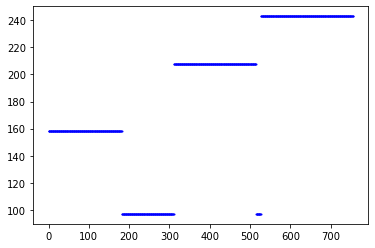

In [58]:
fig = plt.figure()
ax = fig.add_subplot()
xList = [i for i in range(len(mostCommonListLines[0]))]
yList = mostCommonListLines[0]
ax.scatter(xList, yList, s = 1,c = 'blue')

In [59]:
def countSegmentationFun(mostCommonList):
    countSegmentation = 1
    currentValue = mostCommonList[0]
    countDifferentTemp = 0
    for i in range(len(mostCommonList)):
        if mostCommonList[i] ==  currentValue:
            countDifferentTemp = 0
            continue
        else:
            countDifferentTemp += 1
            if countDifferentTemp > 20:
                currentValue = mostCommonList[i]
                countSegmentation += 1
    return countSegmentation

In [60]:
countSegmentationList = []
for mostCommonList in mostCommonListLines:
    countSegmentation = countSegmentationFun(mostCommonList)
    countSegmentationList.append(countSegmentation)
countSegmentationList

[4, 7, 9, 7, 10, 9, 10, 10, 6, 8, 7, 6, 10, 10, 9, 8, 10, 9, 9, 8, 8, 6]

In [61]:
countSegmentation = max(countSegmentationList)
totalNumCluster = countSegmentation**2
numClusterEach = math.ceil(totalNumCluster / 4)
print(numClusterEach)
numCluster0, numCluster1, numCluster2, numCluster3 = numClusterEach,numClusterEach,numClusterEach,numClusterEach

25


In [62]:
kmeans0 = KMeans(n_clusters = numCluster0).fit(pixelCoordList0_sample)
kmeans1 = KMeans(n_clusters = numCluster1).fit(pixelCoordList1_sample)
kmeans2 = KMeans(n_clusters = numCluster2).fit(pixelCoordList2_sample)
kmeans3 = KMeans(n_clusters = numCluster3).fit(pixelCoordList3_sample)

In [29]:
zCenters0 = [colorGrey0 for i in range(kmeans0.cluster_centers_.shape[0])]
zCenters1 = [colorGrey1 for i in range(kmeans1.cluster_centers_.shape[0])]
zCenters2 = [colorGrey2 for i in range(kmeans2.cluster_centers_.shape[0])]
zCenters3 = [colorGrey3 for i in range(kmeans3.cluster_centers_.shape[0])]

In [30]:
coordCenters0 = kmeans0.cluster_centers_.tolist()
coordCenters1 = kmeans1.cluster_centers_.tolist()
coordCenters2 = kmeans2.cluster_centers_.tolist()
coordCenters3 = kmeans3.cluster_centers_.tolist()

In [31]:
zCenters = zCenters0 + zCenters1 + zCenters2 + zCenters3
coordCenters = coordCenters0 + coordCenters1 + coordCenters2 + coordCenters3

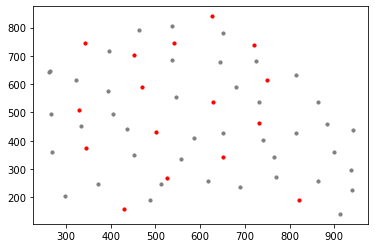

In [32]:
fig = plt.figure()
ax = fig.add_subplot()
xList = [pixelCoord[0] for pixelCoord in coordCenters0]
yList = [pixelCoord[1] for pixelCoord in coordCenters0]
ax.scatter(xList, yList, s = 10,c = 'grey')

xList = [pixelCoord[0] for pixelCoord in coordCenters1]
yList = [pixelCoord[1] for pixelCoord in coordCenters1]
ax.scatter(xList, yList, s = 10,c = 'grey')

# only focus on the category with largest value
xList = [pixelCoord[0] for pixelCoord in coordCenters2]
yList = [pixelCoord[1] for pixelCoord in coordCenters2]
ax.scatter(xList, yList, s = 10,c = 'red')

xList = [pixelCoord[0] for pixelCoord in coordCenters3]
yList = [pixelCoord[1] for pixelCoord in coordCenters3]
ax.scatter(xList, yList, s = 10,c = 'grey')
plt.show()

In [35]:
import math
from sklearn.neighbors import KDTree

In [36]:
classHighestValues = coordCenters2 # the third color is with the largest value
X = np.array([[coord[0],coord[1]] for coord in classHighestValues])
kdt = KDTree(X, leaf_size=30, metric='euclidean')
queryResults = kdt.query(X, k=len(classHighestValues), return_distance=True)
distanceArray = queryResults[0]
distanceArray

array([[  0.        , 145.65069722, 146.02728585, 166.83986946,
        210.68624038, 282.95388468, 288.23795142, 303.46972977,
        311.80439195, 325.80146567, 413.10691654, 440.15248476,
        476.97217141, 508.53538411, 510.71697272, 581.38095117],
       [  0.        , 114.35612914, 159.06064087, 163.25341909,
        167.56850817, 171.25561608, 201.55534741, 247.15328206,
        279.45940714, 290.54247292, 290.78500776, 296.08087792,
        305.16669786, 325.80146567, 433.09900316, 528.63313059],
       [  0.        , 126.81878918, 144.0447662 , 154.92209154,
        232.29650945, 276.45846386, 282.95388468, 283.56666003,
        290.78500776, 340.75754542, 368.60832721, 393.06116443,
        396.32804002, 406.57611195, 428.5023577 , 481.45393533],
       [  0.        , 125.50867102, 138.54323631, 178.10945975,
        220.4719101 , 270.05179898, 276.45846386, 290.54247292,
        375.16435832, 377.70291338, 401.18949124, 453.75877961,
        508.53538411, 521.09428344, 5

In [39]:
import statistics
distanceList = distanceArray.tolist()
distanceList = [statistics.median(distances[1:]) for distances in distanceList]
distanceList

[311.8043919512692,
 279.45940714253186,
 290.7850077578919,
 375.1643583188496,
 509.0642274736992,
 273.3730883780791,
 343.04346015194113,
 368.47252862786723,
 307.45465815935665,
 428.50235770423177,
 305.1666978553076,
 314.26975349830457,
 393.061164425958,
 242.353339341644,
 273.3730883780791,
 318.13000022230045]

In [40]:
aveMedianDistanceCenters = sum(distanceList)/len(distanceList)
aveMedianDistanceCenters

333.3423455867069

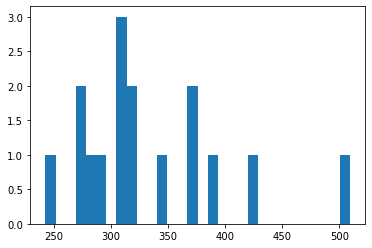

In [41]:
plt.hist(distanceList, 30)
plt.show()

In [47]:
import random
randomPointListMonteCarlo = []

numMonteCarlo = 10000
numClusterCenters = len(distanceList)
for i in range(numMonteCarlo):
    randomPointList = []
    while len(randomPointList) < numClusterCenters:
        x = random.randint(xMin,xMax )
        y = random.randint(yMin,yMax )
        point = Point(x,y)
        if alpha_shape.contains(point):
            randomPointList.append(point)
    randomPointListMonteCarlo.append(randomPointList)

In [48]:
aveMedianDistanceMonteCarlo = []
for randomPointList in randomPointListMonteCarlo:
    X = np.array([[pixelCoord.x,pixelCoord.y] for pixelCoord in randomPointList])
    kdt = KDTree(X, leaf_size=30, metric='euclidean')
    queryResultsAllRandom = kdt.query(X, k=len(distanceList), return_distance=True)
    distanceArrayAllRandom = queryResultsAllRandom[0]
    distanceListAllRandom = distanceArrayAllRandom.tolist()
    distanceListAllRandom = [statistics.median(distanceAllRandom) for distanceAllRandom in distanceListAllRandom]
    aveMedianDistanceRandom = sum(distanceListAllRandom)/len(distanceListAllRandom)
    aveMedianDistanceMonteCarlo.append(aveMedianDistanceRandom)

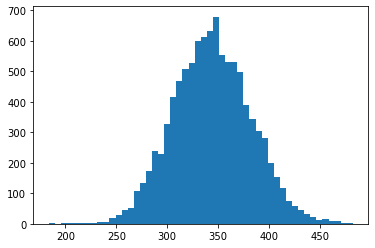

In [49]:
plt.hist(aveMedianDistanceMonteCarlo, 50)
plt.show()

In [50]:
aveMedianDistMontArray = np.asarray(aveMedianDistanceMonteCarlo)
aveMedDistPercentage25 = np.percentile(aveMedianDistMontArray, 2.5)
aveMedDistPercentage25

272.17663922418694

In [51]:
if aveMedianDistanceCenters < aveMedDistPercentage25:
    print('concentrated!')
else:
    print('not concentrated...')

not concentrated...


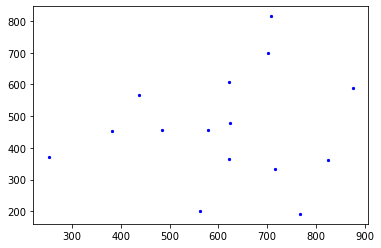

In [106]:
fig = plt.figure()
ax = fig.add_subplot()
xList = [pixelCoord.x for pixelCoord in randomPointList]
yList = [pixelCoord.y for pixelCoord in randomPointList]
ax.scatter(xList, yList, s = 5,c = 'blue')

plt.show()

In [107]:
X = np.array([[pixelCoord.x,pixelCoord.y] for pixelCoord in randomPointList])
kdt = KDTree(X, leaf_size=30, metric='euclidean')
queryResultsAllRandom = kdt.query(X, k=len(distanceList), return_distance=True)
distanceArrayAllRandom = queryResultsAllRandom[0]
distanceListAllRandom = distanceArrayAllRandom.tolist()
distanceListAllRandom = [statistics.median(distanceAllRandom[1:]) for distanceAllRandom in distanceListAllRandom]
distanceListAllRandom

[275.9662589772015,
 254.98599551855705,
 309.0061072120859,
 297.67967845171177,
 399.3561517270074,
 441.1026010853376,
 313.61486292134805,
 226.79333676438353,
 335.0683711511091,
 284.7955787261972,
 332.41622853550246,
 233.1991660646528,
 234.6867925157348,
 249.35343170990757,
 413.0297420787585]

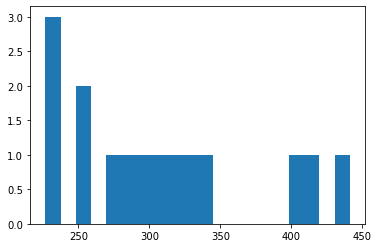

In [108]:
plt.hist(distanceListAllRandom, 20)
plt.show()

In [109]:
from scipy.stats import ranksums
randomSampleArray = np.asarray(distanceListAllRandom)
mapSampleArray = np.asarray(distanceListAll)
ranksums(mapSampleArray, randomSampleArray)

RanksumsResult(statistic=-0.748855503811256, pvalue=0.4539443018131111)

In [110]:
ranksums(mapSampleArray, randomSampleArray,alternative = 'less')

RanksumsResult(statistic=-0.748855503811256, pvalue=0.22697215090655554)

In [111]:
ranksums(mapSampleArray, randomSampleArray,alternative = 'greater')

RanksumsResult(statistic=-0.748855503811256, pvalue=0.7730278490934445)